In [40]:
!wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip bike+sharing+dataset.zip

--2024-08-27 12:51:12--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bike+sharing+dataset.zip.1’

bike+sharing+datase     [  <=>               ] 273.43K  1.08MB/s    in 0.2s    

2024-08-27 12:51:13 (1.08 MB/s) - ‘bike+sharing+dataset.zip.1’ saved [279992]

Archive:  bike+sharing+dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Readme.txt              
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: day.csv                 
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hour.csv                


In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [43]:
df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')

In [44]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
df.drop(columns=['dteday'], inplace=True)

In [45]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_night
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,night
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,night
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,night
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,night
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,night


In [46]:
X = df.drop(columns=['cnt'])
y = df['cnt']

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [48]:
df_ex = df.drop(columns=['day_night','cnt'])
correlation_matrix = df_ex.corr()
correlation_matrix

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336


In [49]:
X['atemp*temp'] = X['atemp'] * X['temp']
X['season'] = X['season'].astype(int)
X['temp*season'] = X['temp'] * X['season']
X['weathersit'] = X['weathersit'].astype(int)
X['hum*weathersit'] = X['hum'] * X['weathersit']

In [50]:
numerical_features = ['temp', 'hum', 'windspeed','temp*season','hum*weathersit','atemp*temp']
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='mean')),
('scaler', MinMaxScaler())
])

In [51]:
X[numerical_features] = numerical_pipeline.fit_transform(X[numerical_features])

In [52]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day_night,atemp*temp,temp*season,hum*weathersit
0,1,0,1,0,0,6,0,1,0.224490,0.2879,0.81,0.0,night,0.071975,0.072848,0.217742
1,1,0,1,1,0,6,0,1,0.204082,0.2727,0.80,0.0,night,0.062494,0.066225,0.215054
2,1,0,1,2,0,6,0,1,0.204082,0.2727,0.80,0.0,night,0.062494,0.066225,0.215054
3,1,0,1,3,0,6,0,1,0.224490,0.2879,0.75,0.0,night,0.071975,0.072848,0.201613
4,1,0,1,4,0,6,0,1,0.224490,0.2879,0.75,0.0,night,0.071975,0.072848,0.201613


In [53]:
!pip install category_encoders
from category_encoders import TargetEncoder

y


In [54]:
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target_encoder', TargetEncoder())
])

In [55]:
X_encoded = categorical_pipeline.fit_transform(X[categorical_features],y)

In [56]:
X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)

In [57]:
print(X)

      yr mnth  hr holiday weekday workingday      temp   atemp   hum  \
0      0    1   0       0       6          0  0.224490  0.2879  0.81   
1      0    1   1       0       6          0  0.204082  0.2727  0.80   
2      0    1   2       0       6          0  0.204082  0.2727  0.80   
3      0    1   3       0       6          0  0.224490  0.2879  0.75   
4      0    1   4       0       6          0  0.224490  0.2879  0.75   
...   ..  ...  ..     ...     ...        ...       ...     ...   ...   
17374  1   12  19       0       1          1  0.244898  0.2576  0.60   
17375  1   12  20       0       1          1  0.244898  0.2576  0.60   
17376  1   12  21       0       1          1  0.244898  0.2576  0.60   
17377  1   12  22       0       1          1  0.244898  0.2727  0.56   
17378  1   12  23       0       1          1  0.244898  0.2727  0.65   

       windspeed  atemp*temp  temp*season  hum*weathersit           0  \
0       0.000000    0.071975     0.072848        0.217742  111

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [59]:
X_train

,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,atemp*temp,temp*season,hum*weathersit,0,1,2
335,0,1,11,0,6,0,0.183673,0.1970,0.55,0.263195,0.041042,0.059603,0.147849,111.114569,204.869272,265.225933
7035,0,10,18,0,2,1,0.510204,0.5000,0.42,0.122840,0.270833,0.682119,0.112903,198.868856,204.869272,265.225933
8051,0,12,3,0,3,1,0.448980,0.4545,1.00,0.263195,0.217781,0.602649,0.806452,198.868856,111.579281,98.894138
2133,0,4,18,0,0,0,0.448980,0.4545,0.31,0.000000,0.217781,0.298013,0.166667,208.344069,175.165493,265.225933
8485,0,12,6,0,0,0,0.183673,0.2273,0.75,0.122840,0.047354,0.059603,0.201613,111.114569,204.869272,265.225933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,4,9,0,5,1,0.448980,0.4545,0.88,0.105325,0.217781,0.298013,0.236559,208.344069,204.869272,265.225933
11964,1,5,17,0,5,1,0.653061,0.6212,0.34,0.157870,0.427075,0.430464,0.091398,208.344069,204.869272,265.225933
5390,0,8,12,0,3,1,0.795918,0.7273,0.43,0.333373,0.606083,0.788079,0.115591,236.016237,204.869272,265.225933
860,0,2,7,0,2,1,0.224490,0.1970,0.65,0.491243,0.049250,0.072848,0.174731,111.114569,204.869272,265.225933


In [60]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Linear Regressor from Scratch

In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
def linear_regression_fit(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

def linear_regression_predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

theta = linear_regression_fit(X_train.values, y_train.values)
y_pred_linear_scratch = linear_regression_predict(X_test.values, theta)

mse_linear_scratch = mean_squared_error(y_test, y_pred_linear_scratch)
r2_linear_scratch = r2_score(y_test, y_pred_linear_scratch)
print(f'Mean Squared Error: {mse_linear_scratch}')
print(f'R-squared: {r2_linear_scratch}')

Mean Squared Error: 15085.965596967199
R-squared: 0.523582200253986


# Linear Regressor from Sklearn

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred_linear = linear_model.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression - Mean Squared Error: {mse_linear}')
print(f'Linear Regression - R-squared: {r2_linear}')

Linear Regression - Mean Squared Error: 15085.965596967988
Linear Regression - R-squared: 0.5235822002539612


In [66]:
linear_pipeline = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', categorical_pipeline),
    ('model', LinearRegression())
])

In [67]:
from sklearn import set_config
set_config(display='diagram')
linear_pipeline


Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('target_encoder',
                                  TargetEncoder(cols=[0, 1, 2]))])),
                ('model', LinearRegression())])

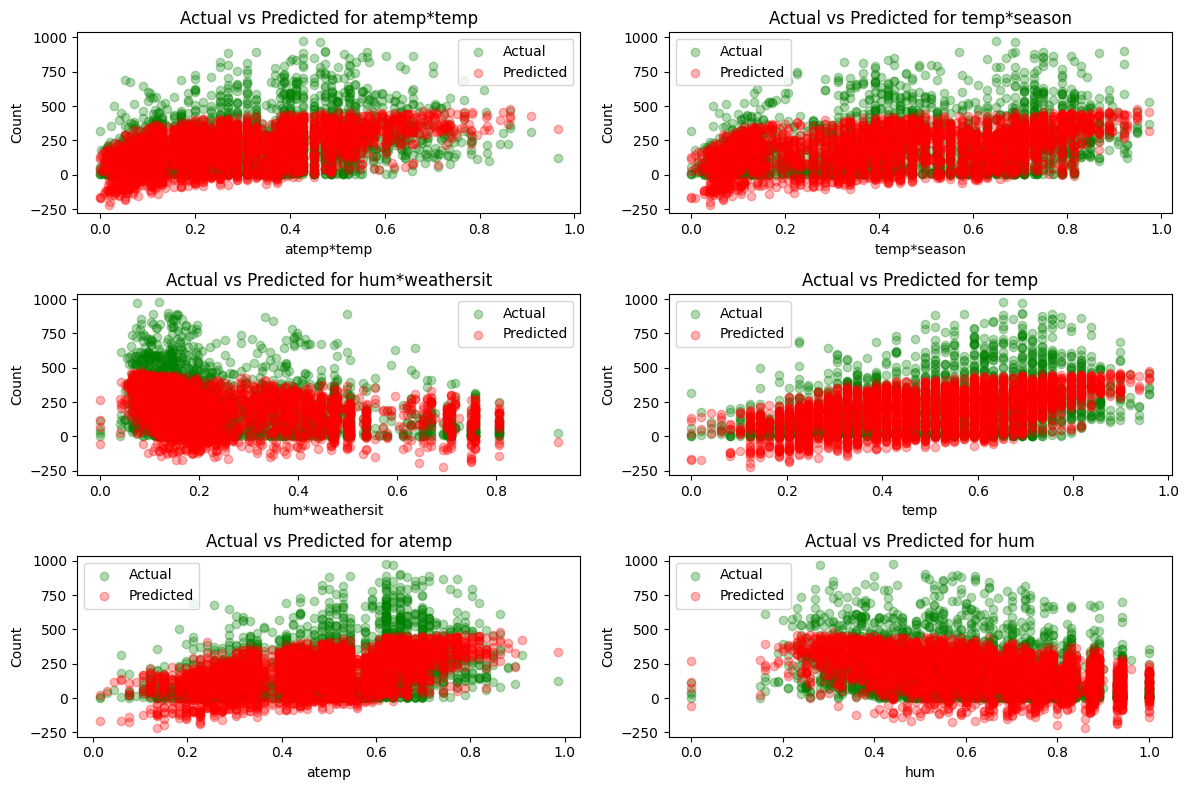

In [68]:
import matplotlib.pyplot as plt

features_to_plot = ['atemp*temp', 'temp*season', 'hum*weathersit', 'temp', 'atemp', 'hum']

n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    axes[i].scatter(X_test[feature], y_test, alpha=0.3, color='green', label='Actual')
    axes[i].scatter(X_test[feature], y_pred_linear, alpha=0.3, color='red', label='Predicted')
    axes[i].set_title(f'Actual vs Predicted for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend()


plt.tight_layout()
plt.show()